In [2]:
#!pip list

In [5]:
#!pip install -r requirements.txt

In [8]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# Importing the dataset
df = pd.read_csv('credit.csv', sep=';')

In [15]:
df.head(15)

,Gender,Married,Dependents,Education,Employed,ApplicantIncome,LoanAmount,Property_Area,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,5849,NaN,Urban,1.0,Y
1,Male,Yes,1,Graduate,No,4583,128.0,Rural,1.0,N
2,Male,Yes,0,Graduate,Yes,3000,66.0,Urban,1.0,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,Urban,1.0,Y
4,Male,No,0,Graduate,No,6000,141.0,Urban,1.0,Y
5,Male,Yes,2,Graduate,Yes,5417,267.0,Urban,1.0,Y
6,Male,Yes,0,Not Graduate,No,2333,95.0,Urban,1.0,Y
7,Male,Yes,3+,Graduate,No,3036,158.0,Semiurban,0.0,N
8,Male,Yes,2,Graduate,No,4006,168.0,Urban,1.0,Y
9,Male,Yes,1,Graduate,No,12841,349.0,Semiurban,1.0,N


In [16]:
df.shape

(614, 10)

Данный датасет находится в открытом доступе на Kaggle. Он содержит в себе 614 наблюдений по 10-ти различным факторам, которые показывают возможность выдачи кредита клиенту.

# Описание

Когда клиент обращается в банк с заявлением о предоставлении кредита, банк принимает решение о выдаче кредита или об отказе в предоставлении кредита с использованием статистических моделей на основании информации о тех клиентах, которые уже брали кредит (кто-то из них выполнил свои обязательства по кредитному договору, а кто-то не выполнил). На вероятность возврата кредита может влиять много факторов, причем сложным образом, и для прогнозирования результатов по каждому отдельному случаю необходимо построить модель машинного обучения, которая на основании данных из заявления о выдаче кредита предсказывает, вернет ли заемщик этот кредит.

Разберемся детальнее с каждой переменной:
    
    1. Gender - как влияет пол на вероятность того, что кредит будет выплачен вовремя.
    
    2. Married - влияет ли брак на возможность выплачивания кредита. Хотя, можно предположить, что семейные пары имеют больше растрат, а наличие ребенка усугубляет положение, нежели человек живет один и тратит весь доход на себя. Однако так ли это на самом деле - стоит проверить во время исследования.
    
    3. Dependents - весомая характеристика, которая показывает количество иждивенцев у кредитозаемщика. Соответсвенно, чем больше лиц в попечительстве, тем больше растраты на их нужды и меньше вероятность выплачивания кредита.
    
    4. Education - так же существует вероятность, что люди с высшим образованием будут находиться на хорошооплачиваемой работе и стабильной должности, что увеличивает шанс выплаты кредита.
    
    5. Employed - в данном случае подразумевается официальное трудоустройство. Логично, что люди с официальным трудоустройством не могут резко потерять работу и больше вероятность на их выплату.
    
    6. ApplicantIncome - прибыль заемщика. Отталкиваясь от данного параметра  можно понять какую сумму кредита возможно выдать, на какой срок и соответсвенно возможность дальнейшей выплаты.
    
    7. Loan Amount - желаемая сумма кредита. Исходя из сопутсвующих факторов можно предположить сможет ли заемщик выплачивать желаемую им сумму и стоит ли выдавать кредит.
    
    8. Property_Area - место проживание. Вероятнее, что заемщик из города будет с большим заработком и соответсвенно больший шанс на добросовестную выплату.
    
    9. Credit_History - также весомая характеристика, которая указывает на то, что у человека с плохой кредитной историей во-первых может пропасть доверие со стороны банковских структур, а во-вторых меньше вероятность на своевременные выплаты.
    
    10. Loan_status - есть ли на данный момент другой кредит. Вероятно, что если присутствует сторонний кредит, то уменьшается шанс на выплату этого.
    

# Цель

В рамках данного исследования целесообразно построить модель кластеризации, которая будет разделять население на несколько категорий (допустим, добросовестных заемщиков и тех, кому лучше не предоставлять кредит). Данная модель будет интересна как, для сферы предоставления в сферу банковских услуг, либо для часного пользования (если вы уже являетесь банком). Поэтому актуальность датасета подтверждается. 

Перед непосредственным построением модели данные следует подготовить (устранить наличие выбросов, пропусков, корреляций и тд).

In [18]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [19]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [20]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

# Visualization

<AxesSubplot:ylabel='Frequency'>

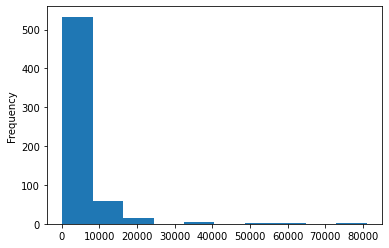

In [21]:
# Feature distribution
df['ApplicantIncome'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

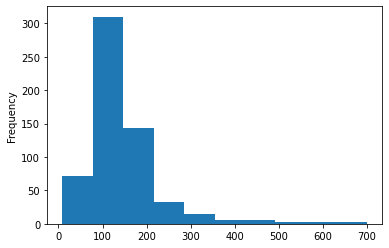

In [22]:
# Feature distribution
df['LoanAmount'].plot(kind = 'hist')

Таким образом, по переменной Income наблюдается длинный хвост, который содержит нетипичные для выборки значения. Данный фактор следует проверить на наличие выброса. Что собственно можно сказать и про сумму кредита.

# Missing data

In [24]:
# Cheking Missing data
df.isnull().sum()

Gender             13
Married             3
Dependents         15
Education           0
Employed           32
ApplicantIncome     0
LoanAmount         22
Property_Area       0
Credit_History     50
Loan_Status         0
dtype: int64

Большинство факторов имеют пропущенные значения. Однако, это количество некритично в сравнении с общим числом наблюдений. Таким образом следует заполнить пропуски.

In [26]:
#!pip install sklearn

In [27]:
# Taking care of missing data
dfm = df

from sklearn.impute import SimpleImputer
#numeric

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['LoanAmount']] = imputer_mean.fit_transform(dfm[['LoanAmount']]).round()

#strings
imputer_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfm[['Gender']] = imputer_freq.fit_transform(dfm[['Gender']])
dfm[['Married']] = imputer_freq.fit_transform(dfm[['Married']])
dfm[['Dependents']] = imputer_freq.fit_transform(dfm[['Dependents']])
dfm[['Employed']] = imputer_freq.fit_transform(dfm[['Employed']])
dfm[['Credit_History']] = imputer_freq.fit_transform(dfm[['Credit_History']])

In [28]:
dfm.isnull().sum()

Gender             0
Married            0
Dependents         0
Education          0
Employed           0
ApplicantIncome    0
LoanAmount         0
Property_Area      0
Credit_History     0
Loan_Status        0
dtype: int64

Пропуски были заполнены. Для количественных переменных заполнено произведено средними значениями, а для качественных - наиболее встречающимися

# Outliers

In [30]:
dfm['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [32]:
dfm['LoanAmount'].describe() 

count    614.000000
mean     146.397394
std       84.037503
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [34]:
# Outliers
ApplicantIncome = []
for ai in dfm['ApplicantIncome']:
    if ai > round(dfm['ApplicantIncome'].mean() + 3*dfm['ApplicantIncome'].std()):
        ai = round(dfm['ApplicantIncome'].mean() + 3*dfm['ApplicantIncome'].std()) 
    ApplicantIncome.append(ai)
dfm['ApplicantIncome'] = ApplicantIncome

# Outliers
ApplicantIncome = []
for ai in dfm['ApplicantIncome']:
    if ai < round(dfm['ApplicantIncome'].mean() - 3*dfm['ApplicantIncome'].std()):
        ai = round(dfm['ApplicantIncome'].mean() - 3*dfm['ApplicantIncome'].std()) 
    ApplicantIncome.append(ai)
dfm['ApplicantIncome'] = ApplicantIncome


In [35]:
dfm['ApplicantIncome'].describe()

count      614.000000
mean      5109.052117
std       3990.964073
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      23731.000000
Name: ApplicantIncome, dtype: float64

<AxesSubplot:ylabel='Frequency'>

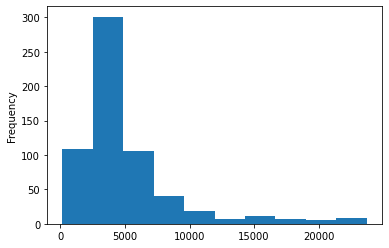

In [36]:
# Feature distribution
dfm['ApplicantIncome'].plot(kind = 'hist')

In [37]:
# Outliers
LoanAmount = []
for la in dfm['LoanAmount']:
    if la > round(dfm['LoanAmount'].mean() + 3*dfm['LoanAmount'].std()):
        la = round(dfm['LoanAmount'].mean() + 3*dfm['LoanAmount'].std()) 
    LoanAmount.append(la)
dfm['LoanAmount'] = LoanAmount

# Outliers
LoanAmount = []
for la in dfm['LoanAmount']:
    if la < round(dfm['LoanAmount'].mean() - 3*dfm['LoanAmount'].std()):
        la = round(dfm['LoanAmount'].mean() - 3*dfm['LoanAmount'].std()) 
    LoanAmount.append(la)
dfm['LoanAmount'] = LoanAmount

In [38]:
dfm['LoanAmount'].describe()

count    614.000000
mean     143.470684
std       71.047132
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      399.000000
Name: LoanAmount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

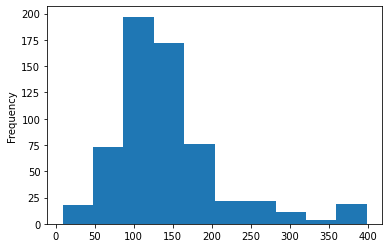

In [39]:
# Feature distribution
dfm['LoanAmount'].plot(kind = 'hist')

Действительно оказалось, что по данным фактором присутствуют значения, которые выходят за рамки 3 сигма. Выбросы были удалены из модели, распределение приблизилось к нормальному, однако по переменной Income остался хвост. Для дальнейшей работы данные будут прологарифмированы. 

# Log

In [41]:
#!pip install seaborn

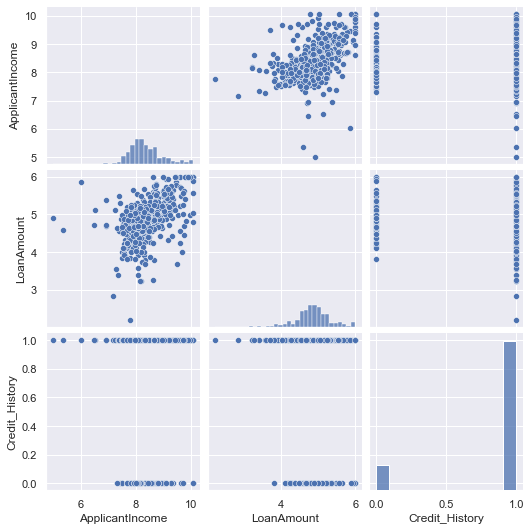

In [42]:
# Log Transformations for Skewed Distributions
dfm[['ApplicantIncome', 'LoanAmount']] = np.log(dfm[['ApplicantIncome', 'LoanAmount']])

import seaborn as sns
sns.set()
sns.pairplot(df)

# Encoding

In [43]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [44]:
# Encoding categorical data
dfm = encoding_char(dfm)
dfm

,Gender,Married,Dependents,Education,Employed,ApplicantIncome,LoanAmount,Property_Area,Credit_History,Loan_Status
0,0,0,0,0,0,8.674026,4.983607,0,1.0,0
1,0,1,1,0,0,8.430109,4.852030,1,1.0,1
2,0,1,0,0,1,8.006368,4.189655,0,1.0,0
3,0,1,0,1,0,7.856707,4.787492,0,1.0,0
4,0,0,0,0,0,8.699515,4.948760,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,7.972466,4.262680,1,1.0,0
610,0,1,3,0,0,8.320205,3.688879,1,1.0,0
611,0,1,1,0,0,8.996157,5.533389,0,1.0,0
612,0,1,2,0,0,8.933664,5.231109,0,1.0,0


Все данные были закодированы. Логарифмированые помогло сделать их сопоставимыми. Таким образом, модель готова к дальнейшему исследованию.

# Correlations

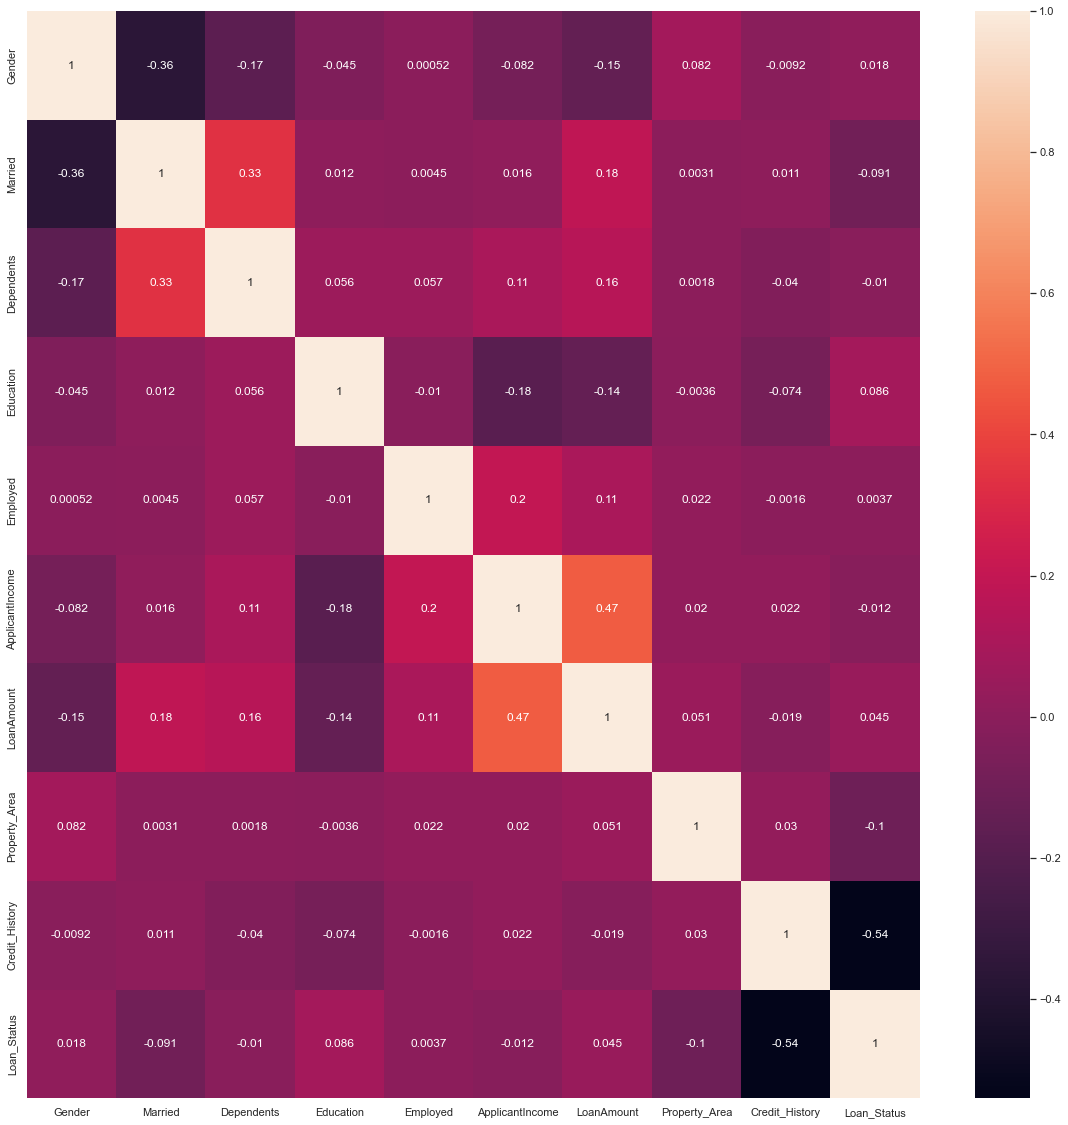

In [46]:
# Cheking correlations
import seaborn as sns
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

Наивысшую степень корреляции показывают переменные Credit_History и Loan_Status. Однако этот уровень взаимодействия не является критичным. Так же логичный получился вывод, что доход коррелирует с требуемой суммой выплаты. Чем больше доход - тем больше человек будет хотеть сумму кредита. Можно сделать вывод, что фактор LoanAmount есть смысл исключить из модели, поскольку сильной информативности он предоставлять не будет.

In [47]:
# Removing Correlated Data
dfr = dfm.drop(['LoanAmount'], axis='columns', inplace=False)
dfr.shape

(614, 9)

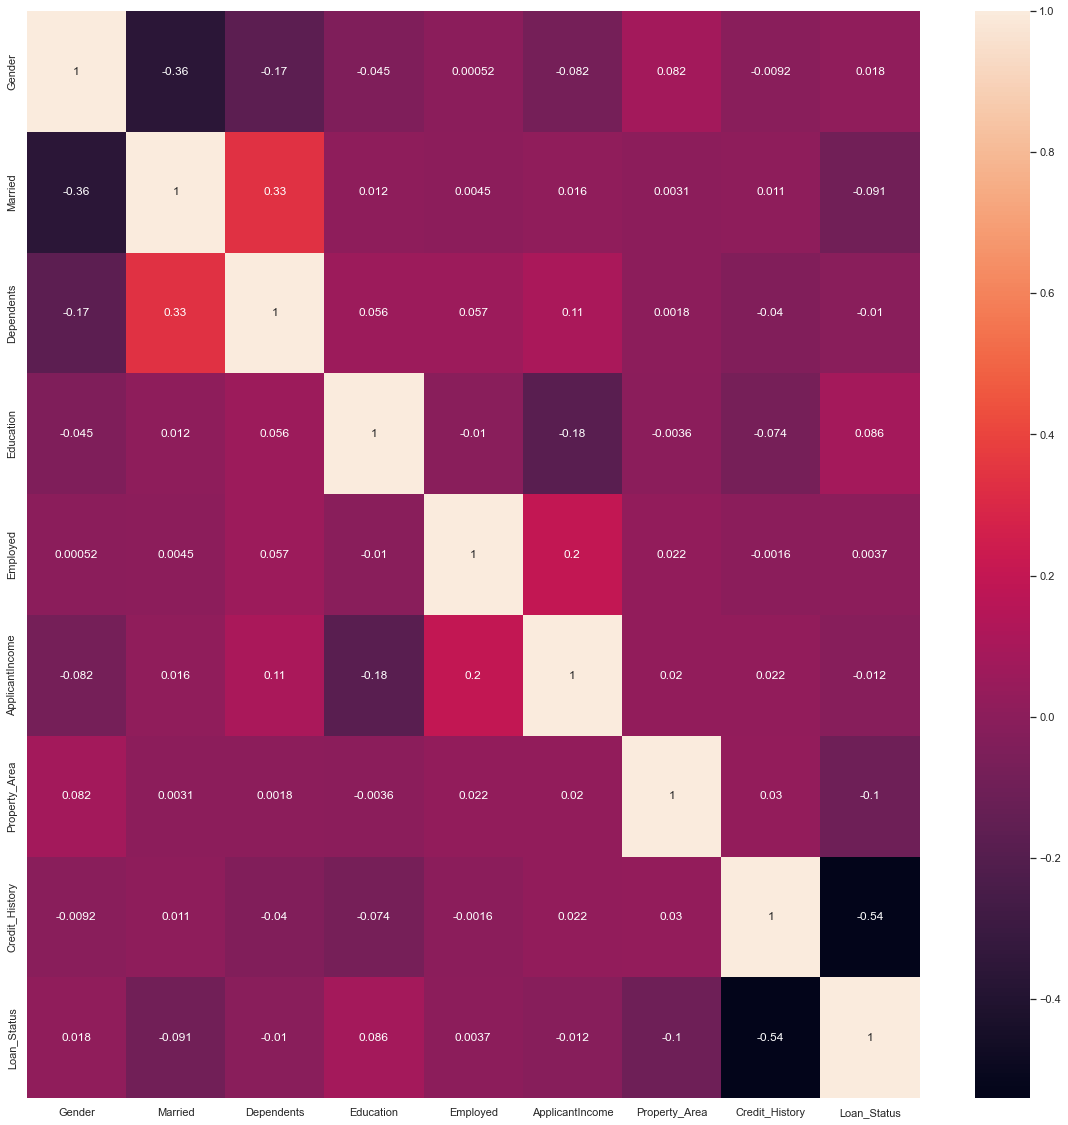

In [48]:
# Cheking correlations
import seaborn as sns
corrmat = dfr.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

In [49]:
# Dataset Statistics
dfr.describe()

,Gender,Married,Dependents,Education,Employed,ApplicantIncome,Property_Area,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.218241,0.133550,8.333341,1.050489,0.855049,0.312704
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.618496,0.840875,0.352339,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.010635,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,7.964677,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,8.246040,1.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,8.664750,2.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10.074537,2.000000,1.000000,1.000000


Таким образом, данные полностью подготовлены и могут использоваться для построения модели кластеризации.

# Exporting

In [50]:
# Exporting the dataset
dfr.to_csv('credit_DataPrep.csv', sep=';', index=False)